<H1>Stratégie Bollinger Trend Multicoin + VaR</H1>
Indicateurs: bande de Bollinger + moyenne mobile long terme<br>
Gestion du risque: Value at Risk (méthode paramétrique)<br>
SEG

In [1]:
# Modules standards
import sys
sys.path.append('../..')
import matplotlib.pyplot as plt
import ccxt
import warnings
warnings.filterwarnings("ignore")

# Modules perso
from utilities.bt_analysis import multi_backtest_analysis
from utilities.strategies.boltrend_multi import BollingerTrendMulti
from utilities.data_manager import ExchangeDataManager
from utilities.plot_analysis import plot_equity_vs_asset, plot_bar_by_month

<H2>Coins + paramètres</H2>

In [6]:
# Liste des coins à backtester avec la stratégie.
# Chaque coin peut avoir un paramètre et un poids différent
wallet_exposure = 0.05      # Taille des lots (0.1=10%)
bb_window = 100             # Fenêtre de la Bollinger
bb_std = 1                  # Déviation standard de la Bollinger
long_ma_window = 550        # Moyenne mobile long terme

params_coin = {
    "BTC/USDT:USDT": {"wallet_exposure": 0.1, "bb_window": bb_window, "bb_std": 2.2,"long_ma_window": long_ma_window},
    "ETH/USDT:USDT": {"wallet_exposure": 0.1, "bb_window": bb_window, "bb_std": 2.2, "long_ma_window": long_ma_window},
    # Altcoin
    "AAVE/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window,"bb_std": bb_std, "long_ma_window": long_ma_window},
    "ADA/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": bb_std, "long_ma_window": long_ma_window},
    "APE/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": bb_std, "long_ma_window": long_ma_window},
    "APT/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": bb_std, "long_ma_window": long_ma_window},
    "ATOM/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": bb_std, "long_ma_window": long_ma_window},
    "AVAX/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": bb_std, "long_ma_window": long_ma_window},
    "AXS/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": bb_std, "long_ma_window": long_ma_window},
    "BNB/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": bb_std, "long_ma_window": long_ma_window},
    "C98/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": bb_std, "long_ma_window": long_ma_window},
    "CRV/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": bb_std, "long_ma_window": long_ma_window},
    "DOGE/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": bb_std, "long_ma_window": long_ma_window},
    "DOT/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": bb_std, "long_ma_window": long_ma_window},
    "DYDX/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": bb_std, "long_ma_window": long_ma_window},
    "EGLD/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": 2.2, "long_ma_window": long_ma_window},
    "ETC/USDT:USDT": {"wallet_exposure": wallet_exposure,"bb_window": bb_window, "bb_std": 2.2, "long_ma_window": long_ma_window},
    "FIL/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": bb_std, "long_ma_window": long_ma_window},
    "FTM/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": bb_std, "long_ma_window": long_ma_window},
    "GALA/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": bb_std, "long_ma_window": long_ma_window},
    "GMT/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": 2.2, "long_ma_window": long_ma_window},
    "GRT/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": bb_std, "long_ma_window": long_ma_window},
    # "ICX/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": bb_std, "long_ma_window": long_ma_window},
    "JASMY/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": 2.2, "long_ma_window": long_ma_window},
    "KNC/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": bb_std, "long_ma_window": long_ma_window},
    "KSM/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": 2.2, "long_ma_window": long_ma_window},
    "LINK/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": bb_std, "long_ma_window": long_ma_window},
    # "LIT/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": bb_std, "long_ma_window": long_ma_window},
    "LRC/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": bb_std, "long_ma_window": long_ma_window},
    "MANA/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": bb_std, "long_ma_window": long_ma_window},
    "MASK/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": bb_std, "long_ma_window": long_ma_window},
    "MATIC/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": bb_std, "long_ma_window": long_ma_window},
    "NEAR/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": bb_std, "long_ma_window": long_ma_window},
    "ONE/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": bb_std, "long_ma_window": long_ma_window},
    "OP/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": 2.2, "long_ma_window": long_ma_window},
    "RDNT/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": bb_std, "long_ma_window": long_ma_window},
    "ROSE/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": bb_std, "long_ma_window": long_ma_window},
    "SAND/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": bb_std, "long_ma_window": long_ma_window},
    "1000SHIB/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": bb_std, "long_ma_window": long_ma_window},
    # "SOL/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": bb_std, "long_ma_window": long_ma_window},
    # "STG/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": bb_std, "long_ma_window": long_ma_window},
    # "UNI/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": bb_std, "long_ma_window": long_ma_window},
    "WAVES/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": 2.2, "long_ma_window": long_ma_window},
    "WOO/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": bb_std, "long_ma_window": long_ma_window},
    "XRP/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": bb_std, "long_ma_window": long_ma_window},
    # "ZEC/USDT:USDT": {"wallet_exposure": wallet_exposure, "bb_window": bb_window, "bb_std": bb_std, "long_ma_window": long_ma_window},
}

pair_list = list(params_coin.keys())
exchange_name = "binance"
tf = '1h'
oldest_pair = "BTC/USDT:USDT"

# Nouvelle méthode de chargement des données avec data_manager.py (plus besoin de passer par Javascript)
exchange = ExchangeDataManager(exchange_name=exchange_name, path_download="../database/exchanges")

df_list = {}
for pair in pair_list:
    df = exchange.load_data(pair, tf)
    df_list[pair] = df.loc[:]   # Dates des datas

print("Data load 100%")
# df_list[oldest_pair]

Data load 100%


<H2>Backtest</H2>

In [7]:
# Paramètres à modifier pour le backtest
initial_wallet = 1000
leverage = 1.6
max_var = 1                                 # max_var=1.5 indique que sur 1 heure, le maximum de perte sera de 1.5%
maker_fee, taker_fee = 0.00017, 0.00051     # Bitget
# maker_fee, taker_fee = 0.0003, 0.00012    # Binance

strat = BollingerTrendMulti(
    df_list=df_list,
    oldest_pair=oldest_pair,
    parameters_obj=params_coin,
    type=["long","short"]
)

strat.populate_indicators()
strat.populate_buy_sell()
bt_result = strat.run_backtest(initial_wallet=initial_wallet, leverage=leverage, max_var=max_var, 
                               maker_fee=maker_fee, taker_fee=taker_fee)

# Sections à afficher ou pas pour le backtest complet
df_trades, df_days = multi_backtest_analysis(
    trades=bt_result['trades'], 
    days=bt_result['days'],
    leverage=leverage,
    general_info=True, trades_info=True, days_info=True, long_short_info=True,
    entry_exit_info=True, exposition_info=True, pair_info=True, indepedant_trade=True
)

╒═════════════════════════════════╤═══════════════════════════╕
│ Informations générales          │                           │
╞═════════════════════════════════╪═══════════════════════════╡
│ Période                         │ 21.10.2019 -> 29.02.2024  │
│ Portefeuille initial            │ 1,000.00 $  (levier x1.6) │
│                                 │                           │
│ Portefeuille final              │ 512,505.94 $              │
│ Performance vs US dollar        │ 51,150.59 %               │
│ Pire Drawdown T|D               │ -58.22 % | -59.93 %       │
│ Moyenne journalière Drawdown    │ -13.74 %                  │
│ Buy and hold performance        │ 649.87 %                  │
│ Performance vs buy and hold     │ 6,734.61 %                │
│ Nombre total de trades          │ 6437                      │
│ Sharpe | Sortino | Calmar Ratio │ 2.5 | 4.83 | 2.74         │
│ Global Win rate                 │ 32.14 %                   │
│ Profit moyen                    │ 1.46

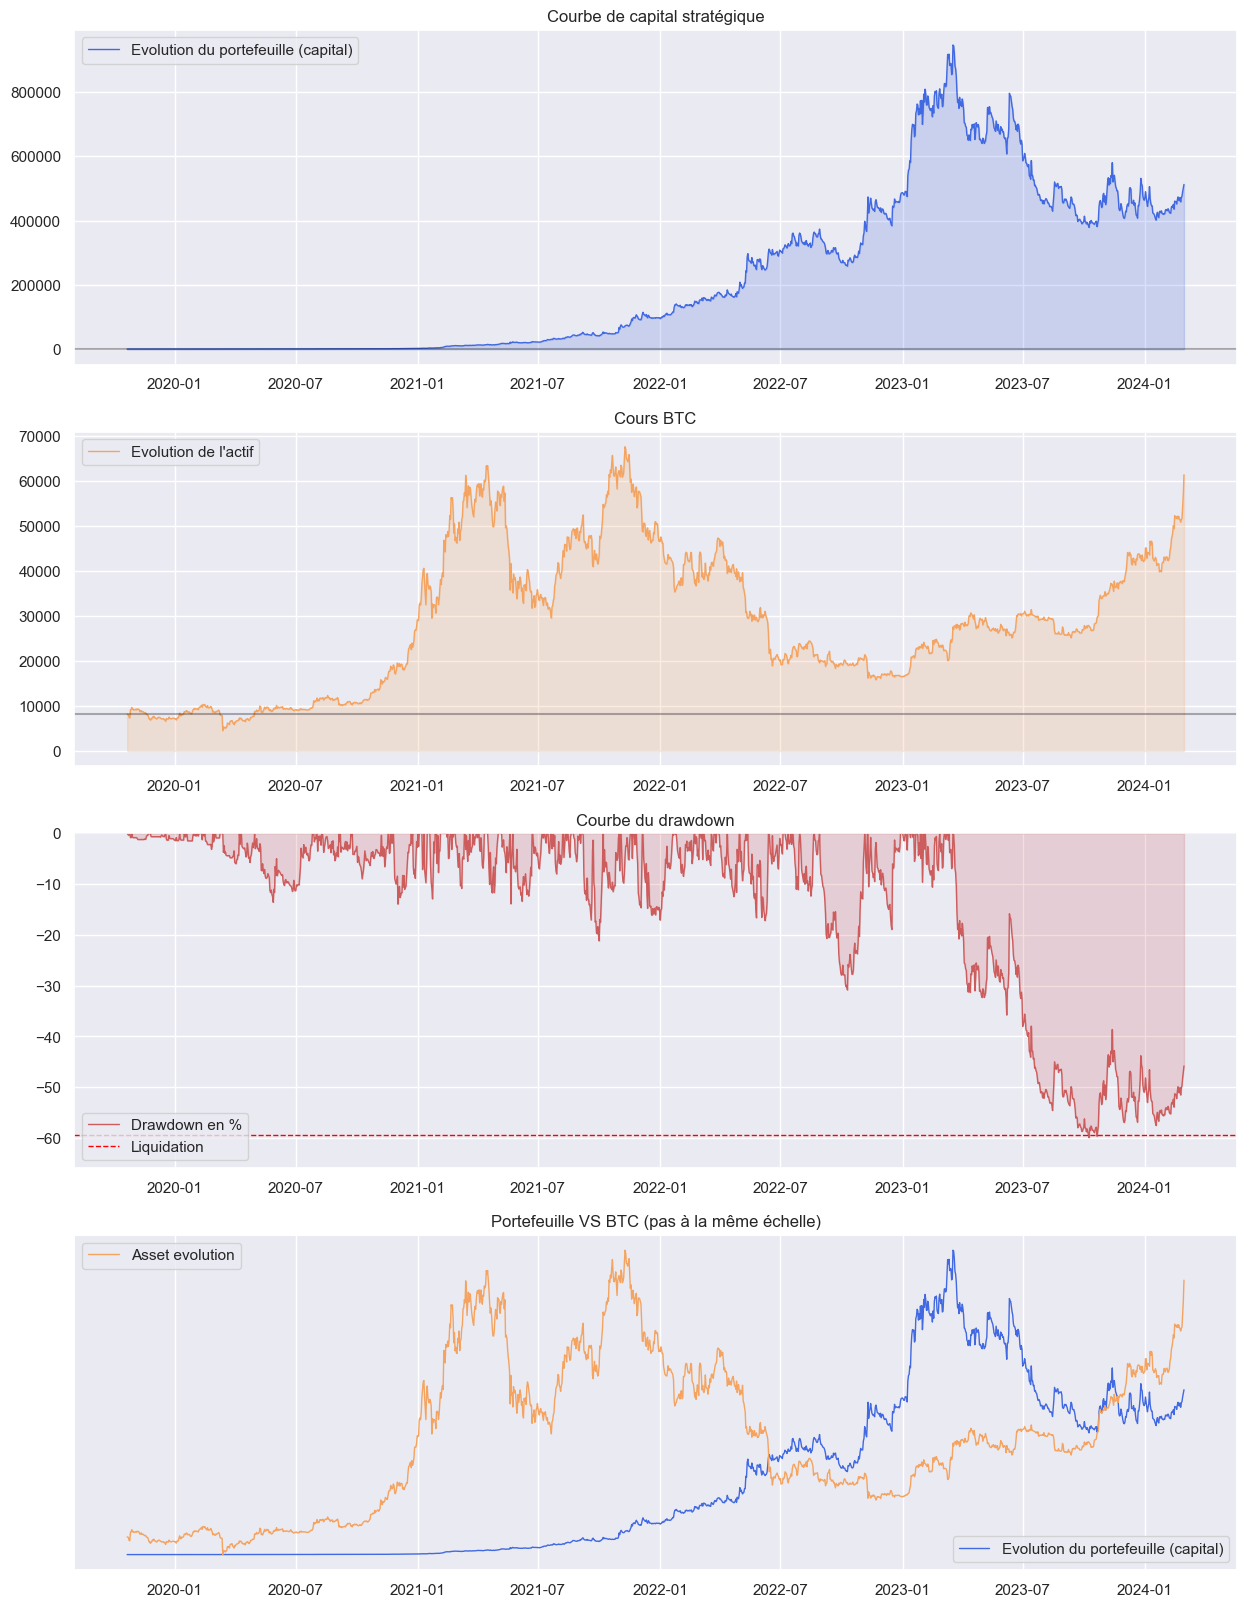

In [8]:
plot_equity_vs_asset(df_days=df_days.loc[:], pair=oldest_pair, leverage=leverage, log=False) 

<H2>Performance par mois et année</H2>

----- 2019 Cumulative Performances: 0.79% -----


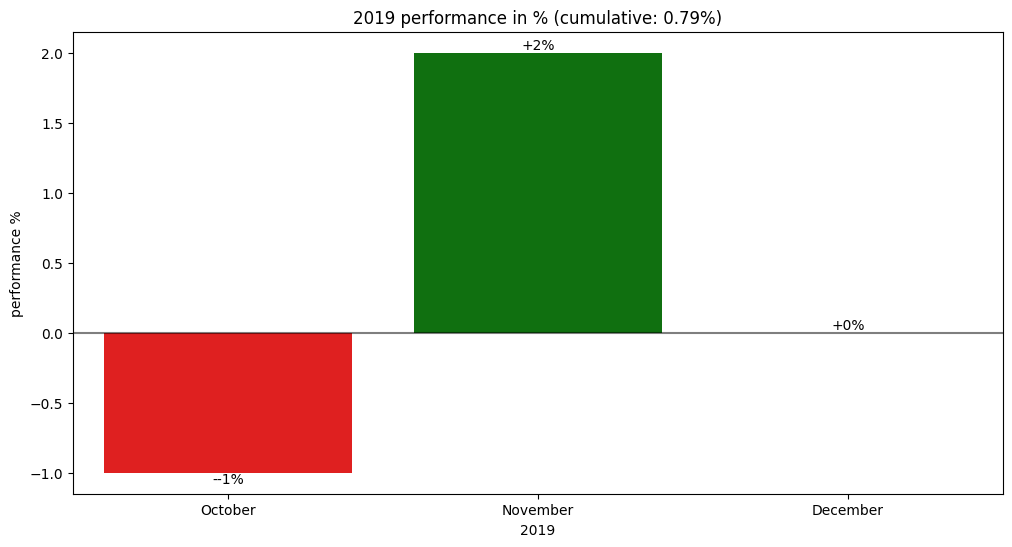

----- 2020 Cumulative Performances: 152.36% -----


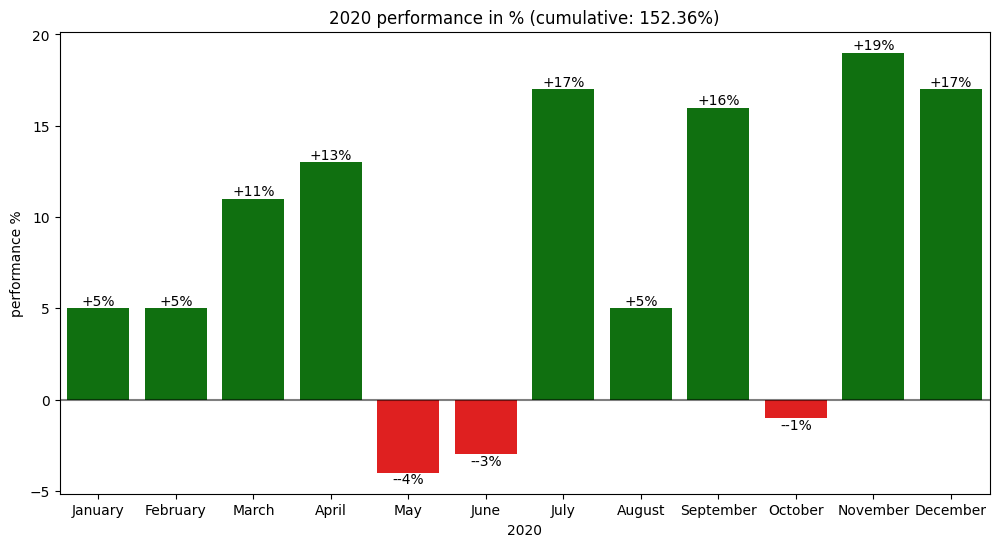

----- 2021 Cumulative Performances: 5443.85% -----


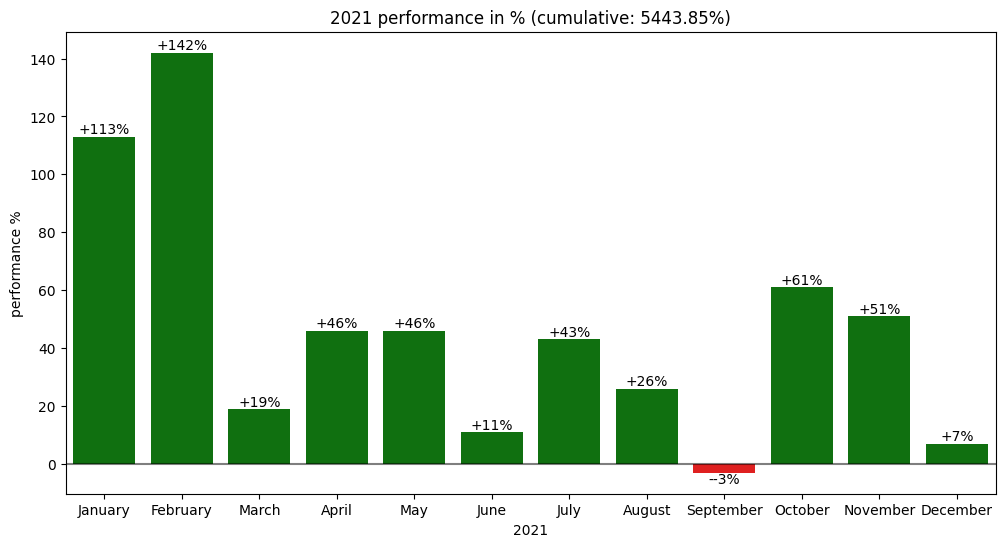

----- 2022 Cumulative Performances: 404.31% -----


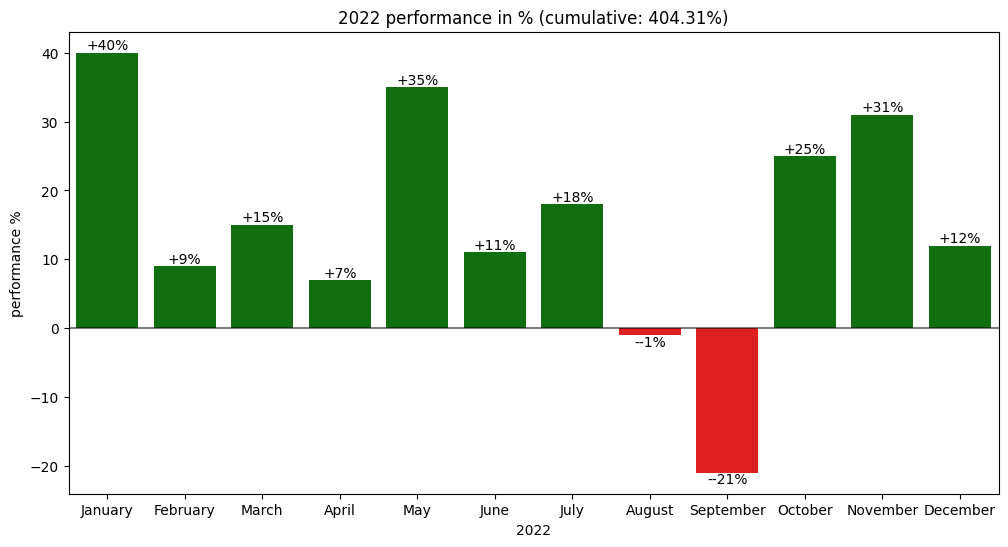

----- 2023 Cumulative Performances: -8.87% -----


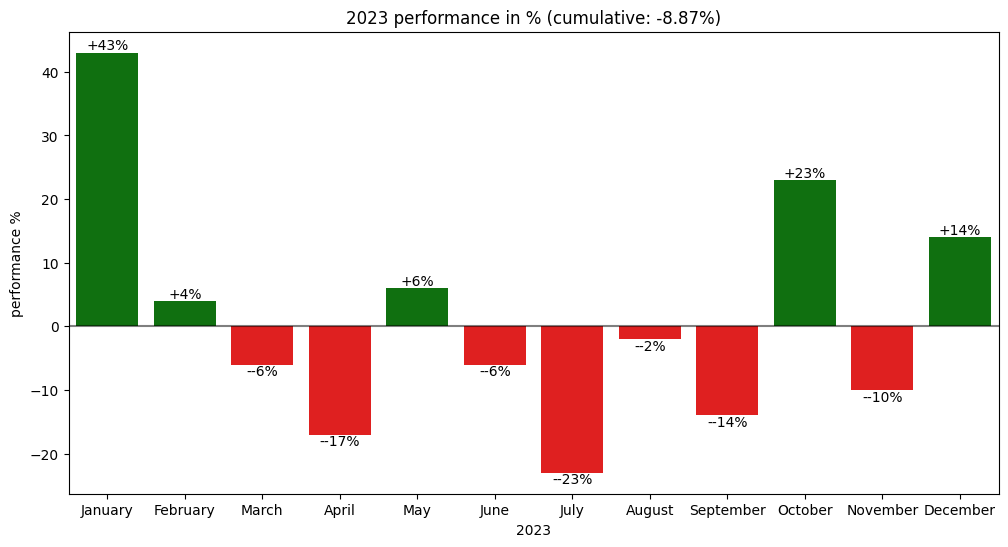

----- 2024 Cumulative Performances: 9.74% -----


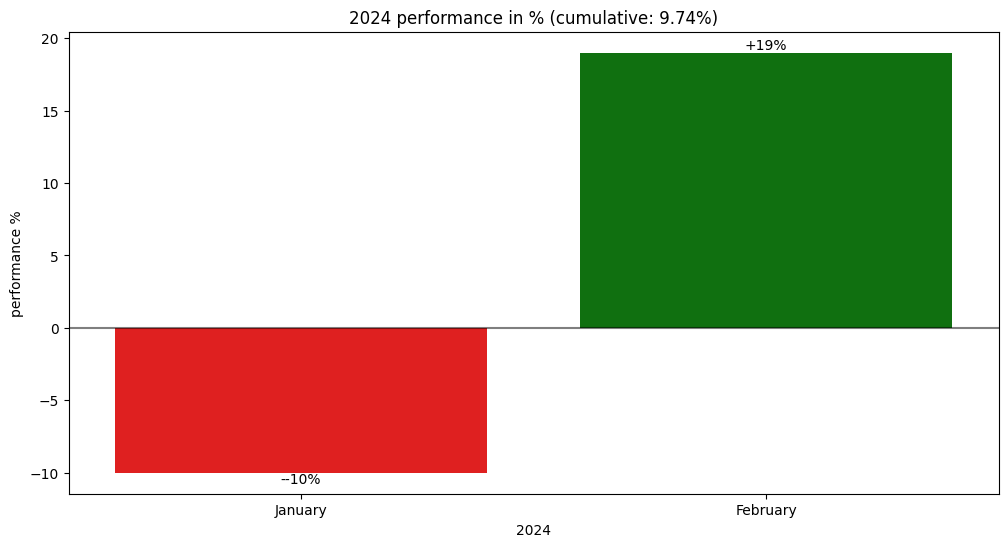

In [4]:
plot_bar_by_month(df_days=df_days.loc[:])

<H2>Courbe de surapprentissage</H2>

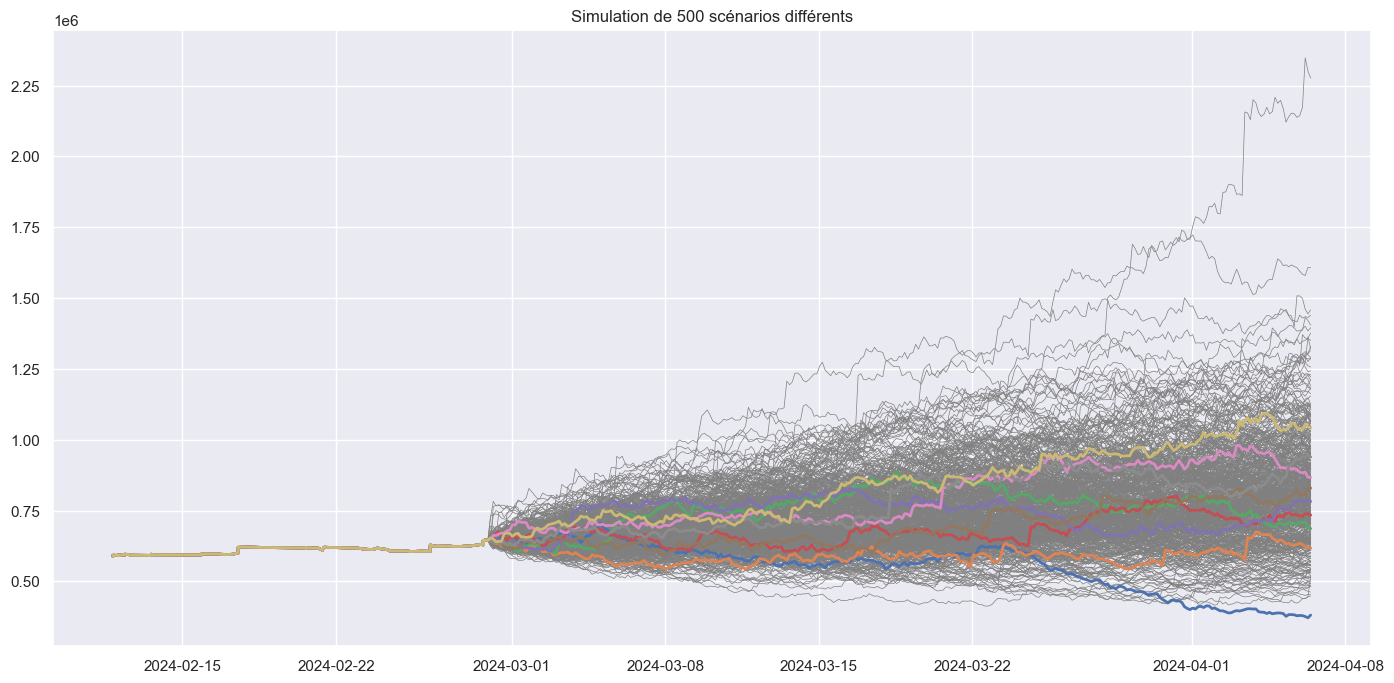

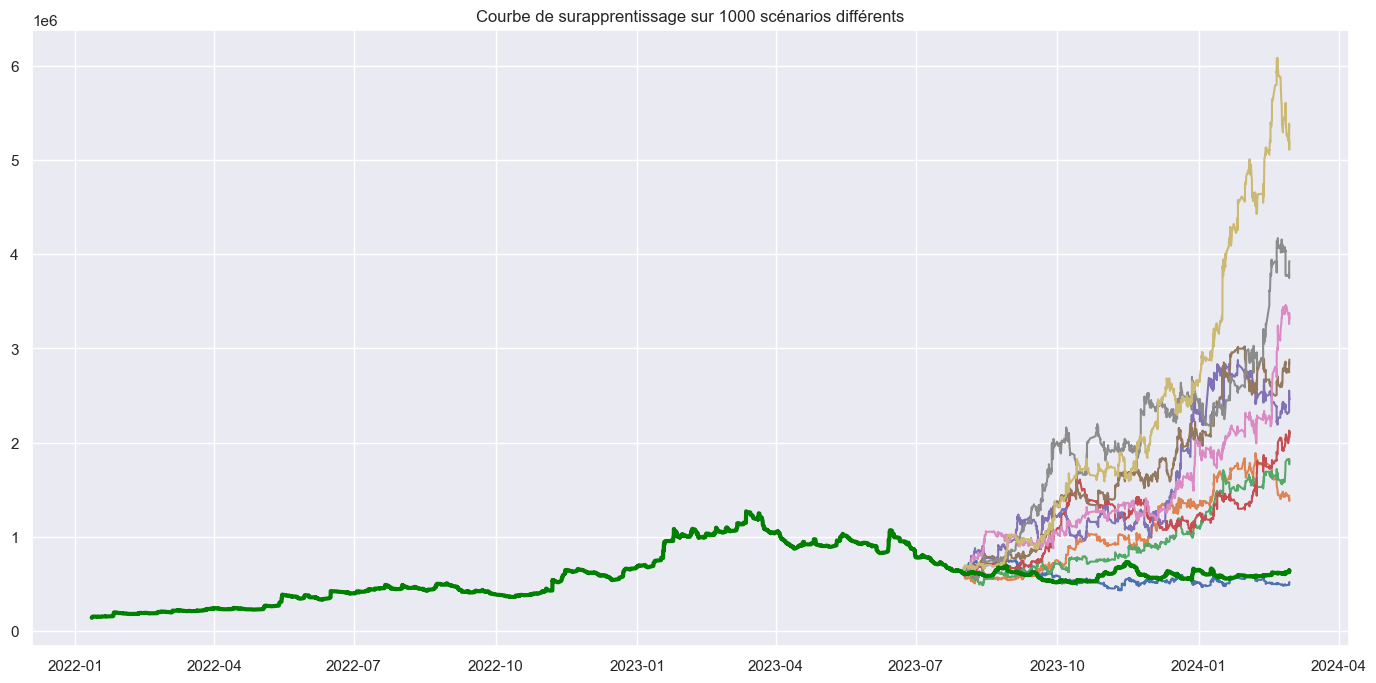

In [5]:
from importlib import reload
import utilities.plot_analysis
reload(utilities.plot_analysis)
from utilities.plot_analysis import plot_futur_simulations, plot_train_test_simulation, detect_date_train_test

# Simulation de divers scénarios futurs
plot_futur_simulations(
    df_trades=df_trades,
    trades_multiplier=3,
    trades_to_forecast=300,
    number_of_simulations=500,
    true_trades_to_show=100,
    show_all_simulations=True
)

# Comparaison entre les divers scénarios et la réalité pour voir si il y a du surapprentissage
# Séparation des échantillons en train et en test - Méthode de Monte Carlo (Loi normale)
plot_train_test_simulation(
    df_trades=df_trades,
    train_test_date="2023-08",
    trades_multiplier=3,
    number_of_simulations=1000,
)